# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [37]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [38]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df.insert(2, 'title_length', df['title'].apply(len))
df.head()

,star_rating,title,title_length,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,24,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,13,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,22,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,15,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,12,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [41]:
# Calcula media, mediana y moda de la columna 'title_length'
media= df['title_length'].mean()
print(f' la media es: {media}\n')

mediana= df['title_length'].median()
print(f' la mediana es: {mediana}\n')

moda= df['title_length'].mode()
print(f' la moda es: {moda}')



 la media es: 15.481103166496425

 la mediana es: 14.0

 la moda es: 0    12
Name: title_length, dtype: int64


Hay una distribución sesgada a la derecha (positivamente), es decir hay títulos largos que desplazan la media hacia la derecha respecto a la mediana y la moda.
La moda 12 significa: la longitud de título más frecuente es 12 caracteres.

In [49]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
# Rango 
min_val = df['title_length'].min()
print(f'el minimo valor es: {min_val}\n')

max_val = df['title_length'].max()
print(f'el maximo valor es: {max_val}\n')

rango = max_val - min_val
print(f'el rango es: {rango}\n')

# Varianza
varianza = df['title_length'].var()  
print(f'la varianza es: {varianza}\n')

# Desviacion 
desviaacion= df['title_length'].std()
print(f'la desviacion es: {desviaacion}\n')

el minimo valor es: 1

el maximo valor es: 68

el rango es: 67

la varianza es: 72.1067488840288

la desviacion es: 8.491569282766807



In [44]:
# Calcula asimetría y curtosis de la columna 'title_length'
# Asimetria 
asimetria= df['title_length'].skew()
print(f'asimetria: {asimetria}\n')

# Curtosis
curtosis= df['title_length'].kurt()
print(f'curtosis: {curtosis}\n')





asimetria: 1.5252523464631278

curtosis: 3.8122887061291544



In [46]:
# Imprime el título más corto y el título más largo según su longitud
# Calcula min y max de 'title_length' y muestra hasta 5 ejemplos para cada caso
min_val = int(df['title_length'].min())
max_val = int(df['title_length'].max())
titulo_min= df.loc[df['title_length'] == min_val, ['title','title_length']]
titulo_max = df.loc[df['title_length'] == max_val, ['title','title_length']]
print(f'titulo_min: {titulo_min}')
print(f'titulo_max: {titulo_max}')


titulo_min:    title  title_length
63     M             1
titulo_max:                                                 title  title_length
48  Dr. Strangelove or: How I Learned to Stop Worr...            68


In [ ]:
# Para verificar cuantos valores minimos hay 
df[df['title_length'] == df['title_length'].max()]


,star_rating,title,title_length,content_rating,genre,duration,actors_list
48,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,68,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."


In [ ]:
# Para verificar cuatos valores maximos hay
df[df['title_length'] == df['title_length'].min()]

,star_rating,title,title_length,content_rating,genre,duration,actors_list
63,8.4,M,1,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land..."


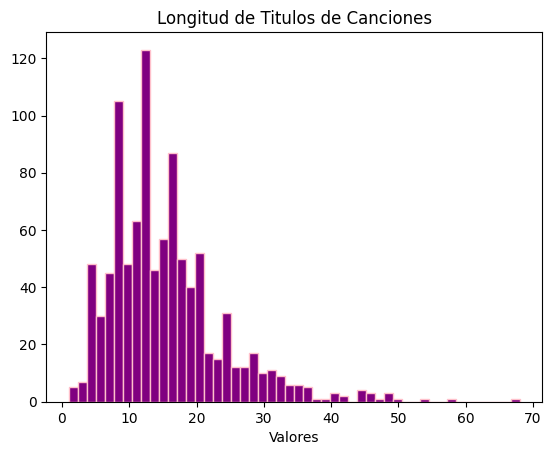

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64


In [58]:
# grafica tus resultados

fig, ax = plt.subplots()
ax.hist(df['title_length'], bins= 50, color='purple', edgecolor='pink') # bins es el número de barras, color es el color de las barras, edgecolor es el color del borde de las barras
ax.set_title('Longitud de Titulos de Canciones')
ax.set_xlabel('Valores')
ax.set_ylabel('') #
plt.show()
print(df['title_length'])


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [59]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista= [13,22,27,47,63]

In [60]:
# Calcula la media de los 5 valores
suma= 13+22+27+47+63
media_lista= suma/5
print(f'la media de la lista es: {media_lista}')

la media de la lista es: 34.4


In [67]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado= [(x - media_lista)**2 for x in lista]
print(f'las diferencias al cuadrado con respecto a la media son: {diferencias_cuadrado}')

las diferencias al cuadrado con respecto a la media son: [457.9599999999999, 153.75999999999996, 54.75999999999998, 158.76000000000005, 817.96]


In [68]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza_lista= sum(diferencias_cuadrado)/ 5
print(f'la varianza de la lista es: {varianza_lista}')

la varianza de la lista es: 328.64
